<a href="https://colab.research.google.com/github/gayathrinalamalapu/customer-segmentation-analysis/blob/main/project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


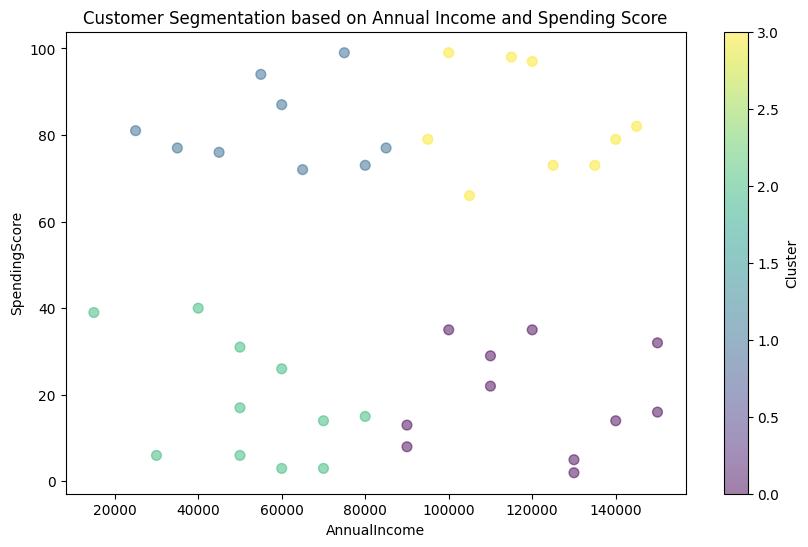

   Cluster   AnnualIncome  SpendingScore  CustomerID
0        0  120000.000000      19.181818          11
1        1   58333.333333      81.777778           9
2        2   52272.727273      18.181818          11
3        3  120000.000000      82.888889           9


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
df = pd.read_csv('/content/customers.csv')
# Perform data cleaning and feature engineering as needed

# Select relevant columns (example: Annual Income and Spending Score)
X = df[['AnnualIncome', 'SpendingScore']].copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['AnnualIncome'], X['SpendingScore'], c=kmeans.labels_, cmap='viridis', s=50, alpha=0.5)
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.xlabel('AnnualIncome')
plt.ylabel('SpendingScore')
plt.colorbar(label='Cluster')
plt.show()

# Analyze clusters
cluster_summary = df.groupby('Cluster').agg({
    'AnnualIncome': 'mean',
    'SpendingScore': 'mean',
    'CustomerID': 'count'
}).reset_index()

print(cluster_summary)

# Implement targeted marketing strategies based on cluster analysis